**Datasets:**

We have collected three financial dataset from Kaggle. 

**1. Synthetc Financial Dataset**

The dataset is Synthetic datasets generated by the PaySim mobile money simulator. Source: Kaggle - https://www.kaggle.com/datasets/ealaxi/paysim1

**2. Fraud transaction Dataset**

The dataset consists of transactions made by considering simulated users through various terminals throughout the period from January 2023 to June 2023. Source: Kaggle https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection

**3. IBM Transactions for Anti Money Laundering (AML)dataset**

"Access to real financial transaction data is highly restricted -- for both proprietary and privacy reasons. Even when access is possible, it is problematic to provide a correct tag (laundering or legitimate) to each transaction -- as noted above. This synthetic transaction data from IBM avoids these problems."

"IBM release 6 datasets here divided into two groups of three:

Group HI has a relatively higher illicit ratio (more laundering).
Group LI has a relatively lower illicit ratio (less laundering).
Both HI and LI internally have three sets of data: small, medium, and large. The goal is to support a broad degree of modeling and computational resources. All of these datasets are independent, e.g. the small datasets are not a subset of the medium datasets. However, each of the six individual datasets can be subset chronologically for train, validate, and test. we have found a 60% / 20% / 20% division to be effective, and encourage others to follow this division.". Source: Kaggle - https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml

**Methodology:**

Exploratory Data Analysis (EDA): Understanding the data and Visualisation.

In [8]:
# Import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

**1. Synthetc Financial Dataset**

In [9]:
# Import dataset
df = pd.read_csv('/Users/saidabdullahi/Desktop/datasets/PS_20174392719_1491204439457_log.csv')

In [10]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
#Columns names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
# Number of rows
len(df)

6362620

In [13]:
# First 10 rows including headings
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [14]:
# Check the number of fraudulent transactions
fraud_counts = df['isFraud'].value_counts()

# Check the number of types
type_counts = df['type'].value_counts()

In [15]:
# Number of fraudulent transactions
fraud_counts

isFraud
0    6354407
1       8213
Name: count, dtype: int64

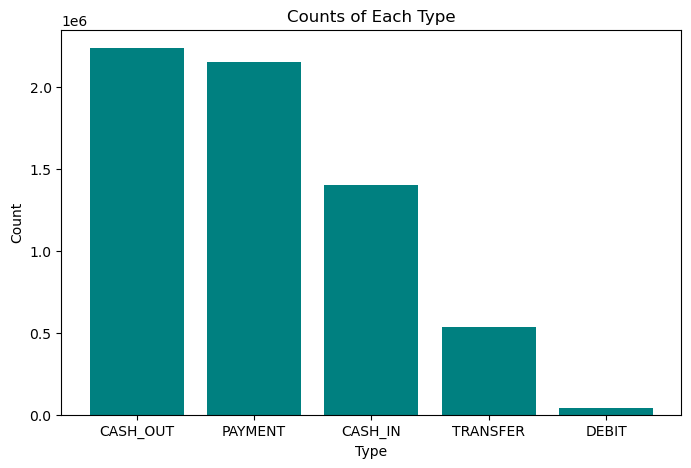

In [18]:
# Plotting the bar chart
plt.figure(figsize=(8,5))
plt.bar(type_counts.index, type_counts.values, color='teal')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Counts of Each Type')
plt.show()

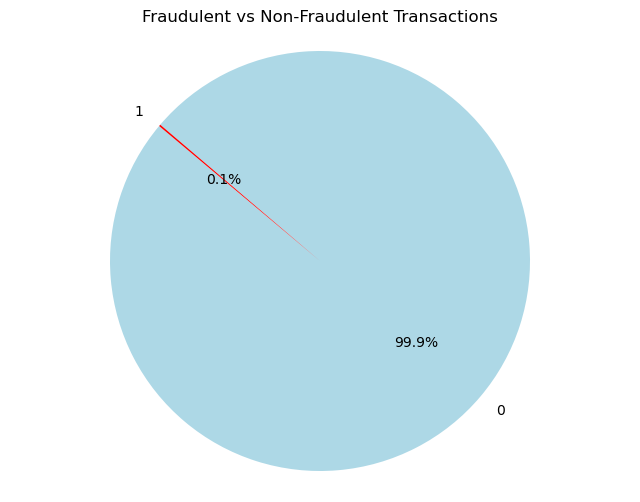

In [16]:
# Create the pie chart
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the figure
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red'])
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()


**2. Fraud transaction Dataset**

In [5]:
# Import dataset
df2 = pd.read_csv('/Users/saidabdullahi/Downloads/FinalTransaction.csv')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [7]:
len(df2)

1754155

In [ ]:
# Import dataset
df_IBM = pd.read_csv('/Users/saidabdullahi/Downloads/IBMTransactionsforAntiMoneyLaundering/HILargeTrans.csv')

In [ ]:
df_IBM.info()

In [ ]:
df_IBM.head(5)

In [ ]:
# Check the number of fraudulent transactions
Laudering_counts = df_IBM['Is Laundering'].value_counts()

print(Laudering_counts)

In [ ]:
Payment_format_counts = df_IBM['Payment Format'].value_counts()

print(Payment_format_counts)

In [ ]:
# Create the pie chart for money laundering
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the figure
plt.pie(Laudering_counts, labels=Laudering_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red'])
plt.title('Laudering vs Non-laudering transactions')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

In [ ]:
# Create the pie chart
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the figure
plt.pie(Payment_format_counts, labels=Payment_format_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'yellow', 'green', 'pink', 'orange', 'black'])
plt.title('Type')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular
plt.show()

In [ ]:
Receiving_Currency_counts = df_IBM['Receiving Currency'].value_counts()

print(Receiving_Currency_counts)

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(Receiving_Currency_group.index, Receiving_Currency_group['Counts'], color='skyblue')
plt.xlabel('Receiving Currency')
plt.ylabel('Counts')
plt.title('Receiving Currency Counts')
plt.xticks(rotation=45)
plt.show()